<a href="https://colab.research.google.com/github/Alan-Cheong/IEEE_QW_2020/blob/master/Mercury_Venus_Earth_Moon_Orbit_Relativistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

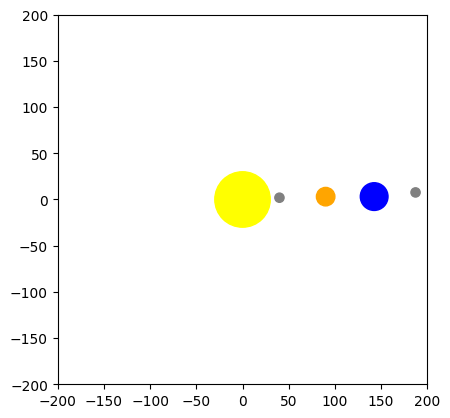

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Constants
sun_x, sun_y = 0, 0
planets = [
    {'name': 'Mercury', 'x': 50, 'y': 0, 'radius': 5, 'color': 'gray', 'angle': 0, 'speed': 0.02, 'precession': 0.004, 'a': 50, 'e': 0.2},
    {'name': 'Venus', 'x': 100, 'y': 0, 'radius': 10, 'color': 'orange', 'angle': 0, 'speed': 0.015, 'precession': 0.002, 'a': 100, 'e': 0.1},
    {'name': 'Earth', 'x': 150, 'y': 0, 'radius': 15, 'color': 'blue', 'angle': 0, 'speed': 0.01, 'precession': 0.001, 'a': 150, 'e': 0.05}
]
moon = {'x': planets[2]['x'] + 50, 'y': planets[2]['y'], 'radius': 5, 'color': 'gray', 'angle': 0, 'speed': 0.05, 'a': 50, 'e': 0.1}

# Create figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-200, 200)
ax.set_ylim(-200, 200)
ax.set_aspect('equal')

# Draw sun
sun_patch = plt.Circle((sun_x, sun_y), 30, color='yellow')
ax.add_patch(sun_patch)

# Draw planets and moon
planet_patches = [plt.Circle((p['x'], p['y']), p['radius'], color=p['color']) for p in planets]
moon_patch = plt.Circle((moon['x'], moon['y']), moon['radius'], color=moon['color'])
for patch in planet_patches:
    ax.add_patch(patch)
ax.add_patch(moon_patch)

def update(frame):
    # Update positions
    for i, planet in enumerate(planets):
        planet['angle'] += planet['speed']
        planet['angle'] += planet['precession']  # Add relativistic precession
        planet['angle'] %= (2 * np.pi)  # Normalize angle to be within [0, 2*pi)
        planet['x'] = sun_x + planet['a'] * (1 - planet['e']**2) / (1 + planet['e'] * np.cos(planet['angle'])) * np.cos(planet['angle'])
        planet['y'] = sun_x + planet['a'] * (1 - planet['e']**2) / (1 + planet['e'] * np.cos(planet['angle'])) * np.sin(planet['angle'])
        planet_patches[i].center = (planet['x'], planet['y'])

    moon['angle'] += moon['speed']
    moon['angle'] %= (2 * np.pi)  # Normalize angle to be within [0, 2*pi)
    moon['x'] = planets[2]['x'] + moon['a'] * (1 - moon['e']**2) / (1 + moon['e'] * np.cos(moon['angle'])) * np.cos(moon['angle'])
    moon['y'] = planets[2]['y'] + moon['a'] * (1 - moon['e']**2) / (1 + moon['e'] * np.cos(moon['angle'])) * np.sin(moon['angle'])
    moon_patch.center = (moon['x'], moon['y'])

    return [sun_patch] + planet_patches + [moon_patch]

# Create animation
ani = animation.FuncAnimation(fig, update, frames=1000, interval=20, blit=True)

# Show plot
plt.show()
HTML(ani.to_html5_video())